# Task 2 · Data Science Lifecycle Planning

This notebook develops the project plan in line with Task 2 of the ITS8080 HEMS brief.

**Goals**
- Map the tailored data science lifecycle for the provided HEMS dataset.
- Highlight where the largest project effort is expected.
- Decide whether additional data sources are required beyond the supplied files.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from pathlib import Path
from IPython.display import display

DATA_PATH = Path('..') / 'data' / 'raw' / 'train_252145.csv'
FIGURES_DIR = Path('..') / 'reports' / 'figures'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [2]:
# Load data and check missing values ratio
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp']).set_index('timestamp')

print("Missing Values Ratio:")
display(df[['pv_mod1', 'pv_mod2', 'pv_mod3', 'pv', 'Demand', 'Price']].isna().mean().sort_values(ascending=False))

Missing Values Ratio:


pv_mod3    0.058226
pv_mod2    0.056057
pv_mod1    0.050006
pv         0.000000
Demand     0.000000
Price      0.000000
dtype: float64

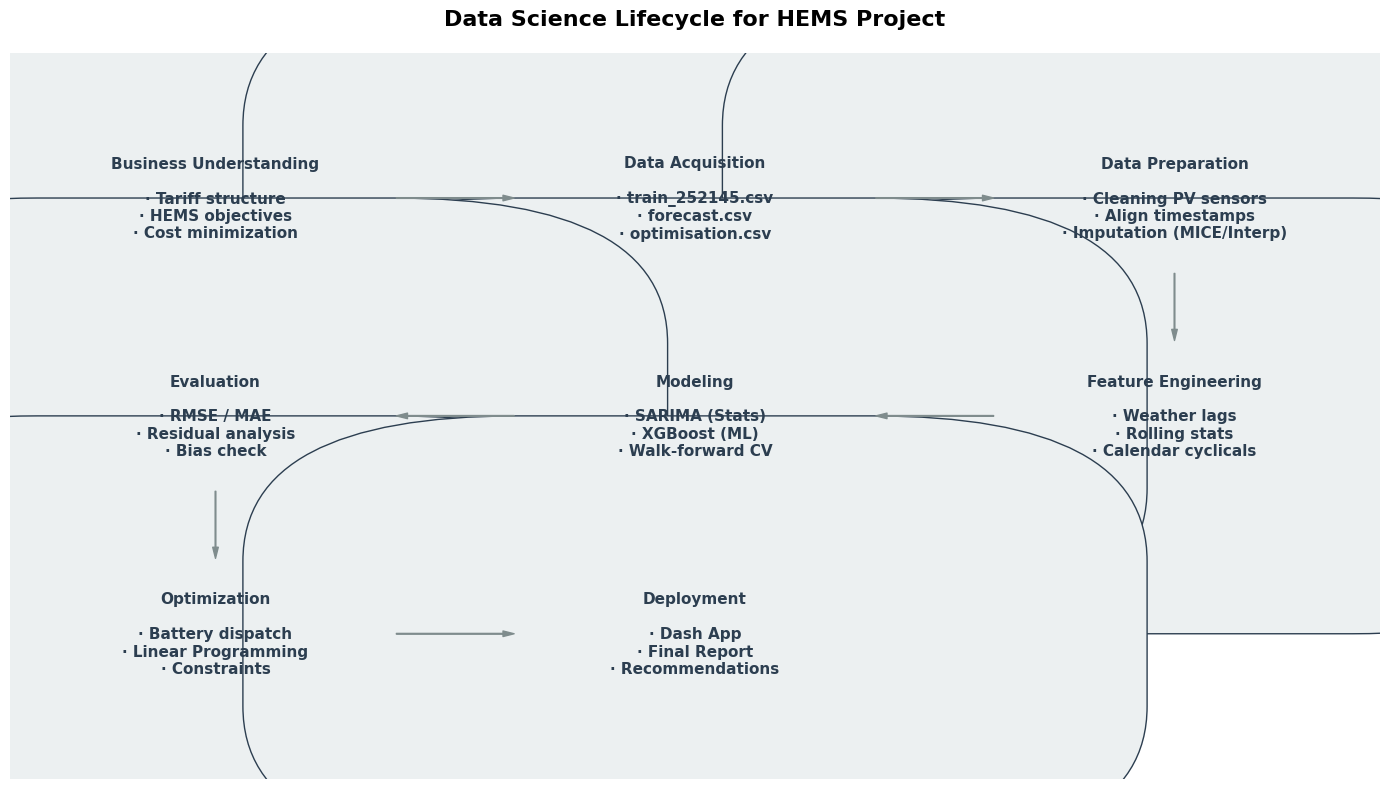

Lifecycle diagram saved to: ../reports/figures/02_lifecycle.png


In [3]:
# Visualize Data Science Lifecycle
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Define steps with (text, (x_center, y_center))
steps = [
  ('Business Understanding\n\n· Tariff structure\n· HEMS objectives\n· Cost minimization', (0.15, 0.8)),
  ('Data Acquisition\n\n· train_252145.csv\n· forecast.csv\n· optimisation.csv', (0.5, 0.8)),
  ('Data Preparation\n\n· Cleaning PV sensors\n· Align timestamps\n· Imputation (MICE/Interp)', (0.85, 0.8)),
  
  ('Feature Engineering\n\n· Weather lags\n· Rolling stats\n· Calendar cyclicals', (0.85, 0.5)),
  ('Modeling\n\n· SARIMA (Stats)\n· XGBoost (ML)\n· Walk-forward CV', (0.5, 0.5)),
  ('Evaluation\n\n· RMSE / MAE\n· Residual analysis\n· Bias check', (0.15, 0.5)),
  
  ('Optimization\n\n· Battery dispatch\n· Linear Programming\n· Constraints', (0.15, 0.2)),
  ('Deployment\n\n· Dash App\n· Final Report\n· Recommendations', (0.5, 0.2))
]

# Draw boxes
for text, (x, y) in steps:
    # Box
    box = FancyBboxPatch((x - 0.13, y - 0.1), 0.26, 0.2, 
                         boxstyle='round,pad=0.02', 
                         ec='#2c3e50', fc='#ecf0f1', 
                         mutation_scale=10)
    ax.add_patch(box)
    # Text
    ax.text(x, y, text, ha='center', va='center', fontsize=11, color='#2c3e50', fontweight='bold')

# Draw arrows
arrow_style = 'simple,tail_width=0.5,head_width=4,head_length=8'
connection_color = '#7f8c8d'

# Logic for arrows: 
# Row 1: Left -> Right
# Row 1 End -> Row 2 Start (Down)
# Row 2: Right -> Left
# Row 2 End -> Row 3 Start (Down)
# Row 3: Left -> Right

# Row 1
ax.add_patch(FancyArrowPatch((0.28, 0.8), (0.37, 0.8), arrowstyle=arrow_style, color=connection_color))
ax.add_patch(FancyArrowPatch((0.63, 0.8), (0.72, 0.8), arrowstyle=arrow_style, color=connection_color))

# Row 1 -> Row 2 (Down)
ax.add_patch(FancyArrowPatch((0.85, 0.7), (0.85, 0.6), arrowstyle=arrow_style, color=connection_color))

# Row 2 (Right to Left)
ax.add_patch(FancyArrowPatch((0.72, 0.5), (0.63, 0.5), arrowstyle=arrow_style, color=connection_color))
ax.add_patch(FancyArrowPatch((0.37, 0.5), (0.28, 0.5), arrowstyle=arrow_style, color=connection_color))

# Row 2 -> Row 3 (Down)
ax.add_patch(FancyArrowPatch((0.15, 0.4), (0.15, 0.3), arrowstyle=arrow_style, color=connection_color))

# Row 3 (Left to Right)
ax.add_patch(FancyArrowPatch((0.28, 0.2), (0.37, 0.2), arrowstyle=arrow_style, color=connection_color))


ax.set_title('Data Science Lifecycle for HEMS Project', fontsize=16, pad=20, fontweight='bold')
plt.tight_layout()

# Save with correct name
figure_path = FIGURES_DIR / '02_lifecycle.png'
fig.savefig(figure_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Lifecycle diagram saved to: {figure_path}")

## Effort focus

- **High effort:** Data preparation and feature engineering. The three PV sensor channels (pv_mod1-3) show potential quality issues (missing values and divergent peaks) that will require cross-validation, outlier treatment, and reconstruction. Additionally, robust features derived from weather variables and calendar effects are essential for both forecasting and optimisation tasks.
- **Moderate effort:** Modelling and evaluation. Constructing ARMA baselines, ML models, and rolling validation will take time but reuses cleaned data.
- **Lower effort:** Business framing and reporting once analytics outputs are produced.

## External data requirements

The supplied datasets already contain timestamped demand, PV output, prices, and weather predictors, which are sufficient for Tasks 1–11. Optional enhancements include:
- **Local weather forecasts** (e.g., numerical weather prediction updates) to improve out-of-sample PV and demand forecasting accuracy.
- **Tariff metadata** detailing taxes or network charges if the optimisation stage must reflect complex billing layers.
At the current scope, no mandatory external data sources are required; completeness checks confirm that critical variables have minimal missingness.

## Next actions

- Execute Task 3 by formalising exploratory visualisations across the full dataset.
- Begin curating a data dictionary from the variables encountered during initial inspection.